<a href="https://colab.research.google.com/github/MarioPrado1148/DSWP_Aluno_Mario/blob/MarioPrado1148-Notebooks/TCC_MBA_FIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação do ambiente de trabalho

## Importação das bibliotecas necessárias para o Projeto de Ciência de Dados¶

In [ ]:
# visualização
import matplotlib.pyplot as plt
import seaborn as sns

# manipulação de dados
import pandas as pd
import numpy as np

# data
from datetime import datetime

# modelos de machine learning
import sklearn as sk


## Demais configurações

Referência: https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [ ]:
d_configuracao = {
    'display.max_columns': 1000,
    'display.expand_frame_repr': True,
    'display.max_rows': 20,
  #  'display.precision': 2,
    'display.show_dimensions': True,
    'display.float_format': (lambda x: '%.2f' % x)
                  }

In [ ]:
for op, value in d_configuracao.items():
    pd.set_option(op, value)
    print(op, value)

display.max_columns 1000
display.expand_frame_repr True
display.max_rows 20
display.show_dimensions True
display.float_format <function <lambda> at 0x0000027C88A371F8>


## Verificação da versões instaladas do python, pandas e numpy

In [ ]:
import platform
print(f'Versão do Python: {platform.python_version()}')
print(f'Versão do Pandas: {pd.__version__}')
print(f'Versão do NumPy.: {np.__version__}')

Versão do Python: 3.7.6
Versão do Pandas: 1.1.3
Versão do NumPy.: 1.18.1


# Importação do dataset a ser analisado e verificações iniciais

## Carregamento do dataset

In [ ]:
dados = pd.read_csv("base_balanceada_seed_3456.csv",index_col=0)

## Amostragem do banco de dados importado

In [ ]:
dados.sample(100, replace= False, random_state= 42)

,numeroCNAESecundarios,tempoExistencia,qtdContratos,qtdOcorrencias,totalVenda,classRisco,porte_id
92989,7,3586,1,0,48500.00,BR,3
17155,1,13123,1,0,32226.00,BR,0
15096,0,4504,1,0,2200.00,BR,1
8376,1,1427,2,0,1590.80,BR,1
71223,4,4143,12,1,1146797.89,BR,3
...,...,...,...,...,...,...,...
47494,0,2254,42,32,697907.44,AR,1
78262,30,3685,21,22,419225.98,AR,3
88435,9,1575,1,4,2620.40,AR,1
71785,1,2789,11,14,2590631.80,BR,1


## Dimensões do dataset importado

In [ ]:
dados.shape

(12844, 7)

## Exemplo das linhas com dtype e classe das variáveis

### Criação da função

In [ ]:
def exemplo_linha(frame, iloc=0):
    df_info = pd.DataFrame(dict(valor_exemplo=frame.iloc[iloc].copy()))
    df_info['dtype_coluna'] = frame.dtypes.map(lambda x: x.name)
    df_info['classe_valor'] = df_info['valor_exemplo'].map(lambda x: x.__class__.__name__)
    df_info.index.name = 'nome_coluna'
    return df_info

### Exemplo_linha

In [ ]:
exemplo_linha(dados)

,valor_exemplo,dtype_coluna,classe_valor
nome_coluna,,,
numeroCNAESecundarios,1,int64,int64
tempoExistencia,1077,int64,int64
qtdContratos,1,int64,int64
qtdOcorrencias,1,int64,int64
totalVenda,800.00,float64,float64
classRisco,AR,object,str
porte_id,1,int64,int64


## Verificação dos valores não nulos e tipos de dados

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12844 entries, 0 to 28992
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   numeroCNAESecundarios  12844 non-null  int64  
 1   tempoExistencia        12844 non-null  int64  
 2   qtdContratos           12844 non-null  int64  
 3   qtdOcorrencias         12844 non-null  int64  
 4   totalVenda             12844 non-null  float64
 5   classRisco             12844 non-null  object 
 6   porte_id               12844 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 802.8+ KB


## Verificação dos Missing Values
Constata-se que não há valores faltantes nas variáveis do DataFrame em estudo.

In [ ]:
dados.isnull().sum()

numeroCNAESecundarios    0
tempoExistencia          0
qtdContratos             0
qtdOcorrencias           0
totalVenda               0
classRisco               0
porte_id                 0
Length: 7, dtype: int64

## Ordenação dos dados pela variável totalVendas
Verifica-se que os maiores valores constantes do dataframe foram importados corretamente.

In [ ]:
dados_ordenado = dados.sort_values(['totalVenda'],
                                   ascending = False, 
                                   kind = 'mergesort')
dados_ordenado.head()

,numeroCNAESecundarios,tempoExistencia,qtdContratos,qtdOcorrencias,totalVenda,classRisco,porte_id
63683,0,9580,235,0,9929901354.15,BR,0
86884,1,8927,6,4,8423809823.99,BR,0
43201,21,9778,421,20,4228389243.33,AR,0
42261,1,13941,38,7,3738112991.40,AR,0
48215,6,5452,132,2,3557719575.16,AR,0


## Criação de variável classRisco2 com valores numéricos
AR (Alto Risco) será substituído por 1. <br>
BR (Baixo Risco) será substituído por 0.

### Criação da nova variável

In [ ]:
dados['classRisco2'] = dados['classRisco']
d_alteracoes = {'AR': '1',
              'BR': '0'}
dados['classRisco2'] = dados['classRisco2'].replace(d_alteracoes)
dados['classRisco2'] = dados['classRisco2'].astype(int)

### Nova amostragem para conferência

In [ ]:
dados.sample(100, replace= False, random_state= 42)

,numeroCNAESecundarios,tempoExistencia,qtdContratos,qtdOcorrencias,totalVenda,classRisco,porte_id,classRisco2
92989,7,3586,1,0,48500.00,BR,3,0
17155,1,13123,1,0,32226.00,BR,0,0
15096,0,4504,1,0,2200.00,BR,1,0
8376,1,1427,2,0,1590.80,BR,1,0
71223,4,4143,12,1,1146797.89,BR,3,0
...,...,...,...,...,...,...,...,...
47494,0,2254,42,32,697907.44,AR,1,1
78262,30,3685,21,22,419225.98,AR,3,1
88435,9,1575,1,4,2620.40,AR,1,1
71785,1,2789,11,14,2590631.80,BR,1,0


### Conferência do tipo de dado da variável recém criada.
Verifica-se que dados['classRisco2'] está como integer, o que é correto.

In [ ]:
dados['classRisco2'].dtype

dtype('int32')

## Verificação do balanceamento da base

Verifica-se que a base está balanceada pois a quantidade de casos de Alto Risco é igual à quantidade de casos de Baixo Risco.

### Tabela de Contigência

In [ ]:
count = pd.DataFrame(dados['classRisco'].value_counts())
percent = pd.DataFrame(dados['classRisco'].value_counts(normalize=True)*100)
table = pd.concat([count, percent], axis=1)
table.columns = ['# target', '% target']
table

,# target,% target
BR,6422,50.00
AR,6422,50.00


### Visualização

Class 0: 6422
Class 1: 6422
Proportion: 1.0 : 1


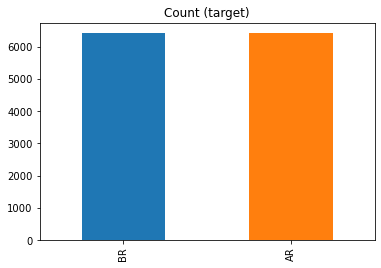

In [ ]:
target_count = dados['classRisco'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)',color = ['#1F77B4', '#FF7F0E']);

## Verificação da correlação entre as variáveis

In [ ]:
dados.corr()

,numeroCNAESecundarios,tempoExistencia,qtdContratos,qtdOcorrencias,totalVenda,porte_id,classRisco2
numeroCNAESecundarios,1.00,-0.07,0.01,0.04,-0.01,0.11,0.19
tempoExistencia,-0.07,1.00,0.06,-0.02,0.07,-0.12,-0.17
qtdContratos,0.01,0.06,1.00,0.58,0.23,-0.04,0.10
qtdOcorrencias,0.04,-0.02,0.58,1.00,0.11,-0.03,0.29
totalVenda,-0.01,0.07,0.23,0.11,1.00,-0.05,0.01
porte_id,0.11,-0.12,-0.04,-0.03,-0.05,1.00,0.14
classRisco2,0.19,-0.17,0.10,0.29,0.01,0.14,1.00


###  Mapa de calor das correlações

In [ ]:
corr = dados.corr()
corr.style.background_gradient(cmap='coolwarm')

,numeroCNAESecundarios,tempoExistencia,qtdContratos,qtdOcorrencias,totalVenda,porte_id,classRisco2
numeroCNAESecundarios,1.000000,-0.070158,0.008986,0.040383,-0.005850,0.109013,0.193342
tempoExistencia,-0.070158,1.000000,0.058524,-0.024027,0.068439,-0.120123,-0.171999
qtdContratos,0.008986,0.058524,1.000000,0.575585,0.232318,-0.036914,0.102356
qtdOcorrencias,0.040383,-0.024027,0.575585,1.000000,0.106823,-0.027811,0.294996
totalVenda,-0.005850,0.068439,0.232318,0.106823,1.000000,-0.052469,0.008143
porte_id,0.109013,-0.120123,-0.036914,-0.027811,-0.052469,1.000000,0.139669
classRisco2,0.193342,-0.171999,0.102356,0.294996,0.008143,0.139669,1.000000


## Verificação dos valores das correlações em ordem decrescente
Foi utilizado o encadeamento de métodos (method chaining).<br>
Verifica-se que existe correlação relativamente elevada entre as variáveis qtdContratos e qtdOcorrencias, de 0.58.<br>
Constata-se também que a variável qtdOcorrencias possui correlação de 0.23 com a variável classRisco, que é nossa target.

In [ ]:
df_corr = dados.corr()
(
    df_corr
    .pipe(lambda df: pd.DataFrame(
        np.where(np.triu(np.ones(df.shape, dtype=int), k=1), df, np.nan),
        index=df.index, columns=df.columns))
    .stack()
    .dropna()
    .sort_values(ascending=False)
)

qtdContratos           qtdOcorrencias     0.58
qtdOcorrencias         classRisco2        0.29
qtdContratos           totalVenda         0.23
numeroCNAESecundarios  classRisco2        0.19
porte_id               classRisco2        0.14
                                          ... 
qtdContratos           porte_id          -0.04
totalVenda             porte_id          -0.05
numeroCNAESecundarios  tempoExistencia   -0.07
tempoExistencia        porte_id          -0.12
                       classRisco2       -0.17
Length: 21, dtype: float64

# Análise univariada de dados

## Sumário estatístico univariado

In [ ]:
def describe_do_mario(df):
    df_descr = df.describe()
    return df_descr.append([
        (df_descr.loc['std'] / df_descr.loc['mean']).rename('cv').to_frame().T,
   #     df.loc[:, df_descr.columns].mode().set_index(iter(['mode']))
    ])


In [ ]:
describe_do_mario(dados)

,numeroCNAESecundarios,tempoExistencia,qtdContratos,qtdOcorrencias,totalVenda,porte_id,classRisco2
count,12844.00,12844.00,12844.00,12844.00,12844.00,12844.00,12844.00
mean,8.28,3639.11,10.44,5.64,8689638.16,1.30,0.50
std,13.18,3403.29,51.96,16.55,144903867.11,1.16,0.50
min,0.00,16.00,1.00,0.00,0.00,0.00,0.00
25%,1.00,1113.75,1.00,0.00,30000.00,0.00,0.00
50%,4.00,2535.50,3.00,1.00,209321.04,1.00,0.50
75%,10.00,5134.75,9.00,6.00,1441694.10,3.00,1.00
max,99.00,27922.00,3125.00,627.00,9929901354.15,3.00,1.00
cv,1.59,0.94,4.98,2.94,16.68,0.89,1.00


## Gráficos de densidade

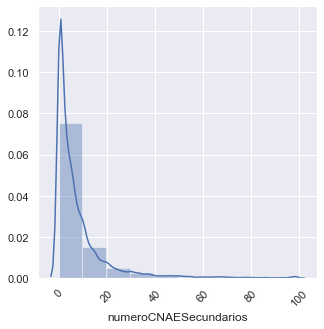

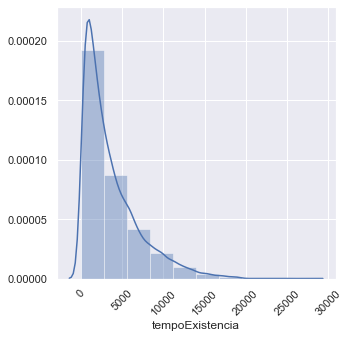

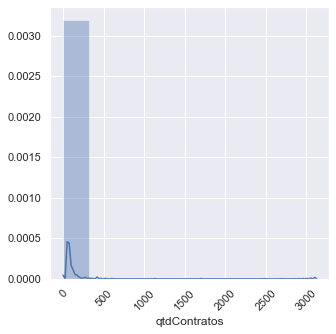

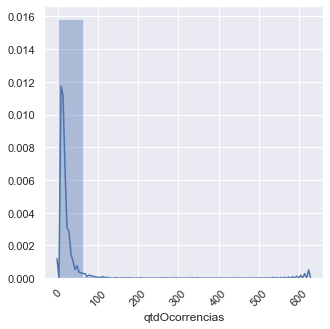

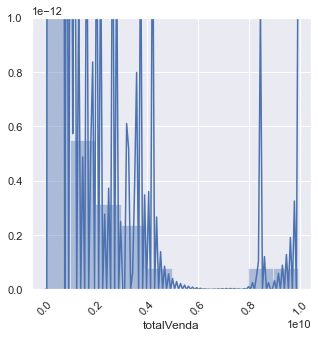

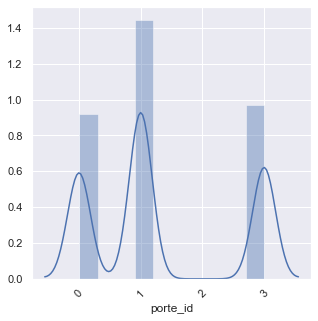

In [ ]:
sns.set(rc = {'figure.figsize': (5, 5)})
fnum = ['numeroCNAESecundarios', 'tempoExistencia', 'qtdContratos',
       'qtdOcorrencias', 'totalVenda', 'porte_id']

for col in fnum:
    plt.figure()
    sns.distplot(dados[col], bins=10)
    plt.xticks(rotation=45)
    plt.show()

## Boxplots

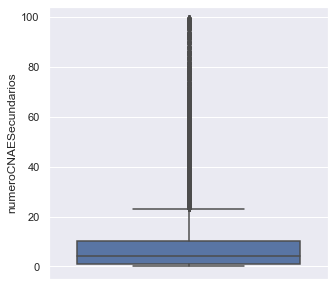

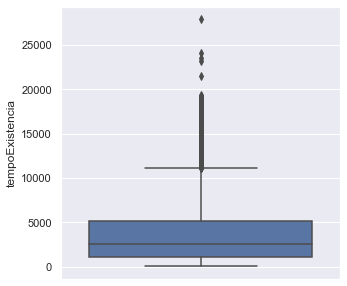

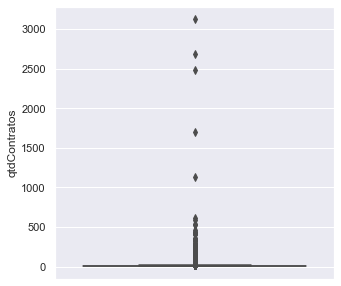

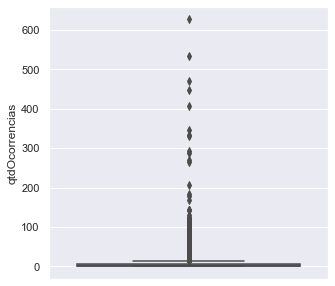

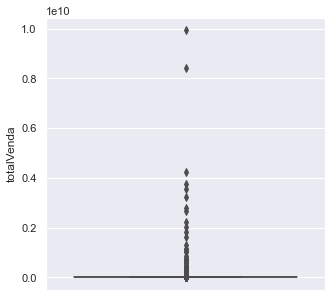

In [ ]:
sns.set( rc = {'figure.figsize': (5, 5)})
fnum = ['numeroCNAESecundarios', 'tempoExistencia', 'qtdContratos',
       'qtdOcorrencias', 'totalVenda']

for col in fnum:
    plt.figure()
    sns.boxplot(y=dados[col])
    plt.xticks(rotation=45)
    plt.show()

# Análise Bivariada de dados

## Tabelas comparativas

### Variável classRisco x numeroCNAESecundarios
Referencia: https://towardsdatascience.com/master-pandas-groupby-for-efficient-data-summarizing-and-analysis-c6808e37c1cb <br>
Verifica-se que, em média, as empresas de alto risco possuem uma quantidade maior de CNAESecundários.

In [ ]:
dados.groupby('classRisco').agg({'numeroCNAESecundarios': ['min','mean','median','max','std']})

numeroCNAESecundarios                       
                             min  mean median max   std
classRisco                                             
AR                             0 10.83      6  99 15.16
BR                             0  5.73      2  99 10.22

[2 rows x 5 columns]

### Variável classRisco x tempoExistencia
Verifica-se que as empresas de alto risco tendem a ser mais jovens do que as empresas de alto risco.

In [ ]:
dados.groupby('classRisco').agg({'tempoExistencia': ['min','mean','median','max','std']})

tempoExistencia                               
                       min    mean  median    max     std
classRisco                                               
AR                      16 3053.77 2098.00  27922 2898.77
BR                      16 4224.45 3045.50  24171 3752.12

[2 rows x 5 columns]

### Variável classRisco x qtdContratos

In [ ]:
dados.groupby('classRisco').agg({'qtdContratos': ['min','mean','median','max','std']})

qtdContratos                         
                    min  mean median   max   std
classRisco                                      
AR                    1 15.76      6  3125 71.73
BR                    1  5.12      2   436 14.07

[2 rows x 5 columns]

### Variável classRisco x qtdOcorrencias
Verifica-se que as empresas de alto risco tendem a ter muito mais ocorrências lançadas pelo Governo do que as empresas de baixo risco.

In [ ]:
dados.groupby('classRisco').agg({'qtdOcorrencias': ['min','mean','median','max','std']})

qtdOcorrencias                        
                      min  mean median  max   std
classRisco                                       
AR                      1 10.52      5  627 21.04
BR                      0  0.75      0  332  7.57

[2 rows x 5 columns]

### Variável classRisco x totalVenda
Verifica-se que, em média, as empresas de alto risco tendem a ter um valor maior de vendas para o Governo do que as empresas de baixo riscfo.}

In [ ]:
dados.groupby('classRisco').agg({'totalVenda': ['min','mean','median','max','std']})

totalVenda                                                
                  min       mean    median           max          std
classRisco                                                           
AR               0.00 9869483.90 495236.72 4228389243.33 107168437.29
BR               0.00 7509792.42  98435.75 9929901354.15 174670183.54

[2 rows x 5 columns]

### Variável classRisco x porte_id
Verifica-se que as empresas de pequeno porte (0) tendem a ter um risco menor do que as de médio e grande porte.

In [ ]:
pd.crosstab(dados['classRisco'],dados['porte_id'])

porte_id,0,1,3
classRisco,,,
AR,1244,3058,2120
BR,2307,2504,1611


### Variável classRisco x todas as demais

In [ ]:
dados_agrupados = dados.groupby(['classRisco']).mean()
dados_agrupados

,numeroCNAESecundarios,tempoExistencia,qtdContratos,qtdOcorrencias,totalVenda,porte_id,classRisco2
classRisco,,,,,,,
AR,10.83,3053.77,15.76,10.52,9869483.90,1.47,1
BR,5.73,4224.45,5.12,0.75,7509792.42,1.14,0


### Pairplot

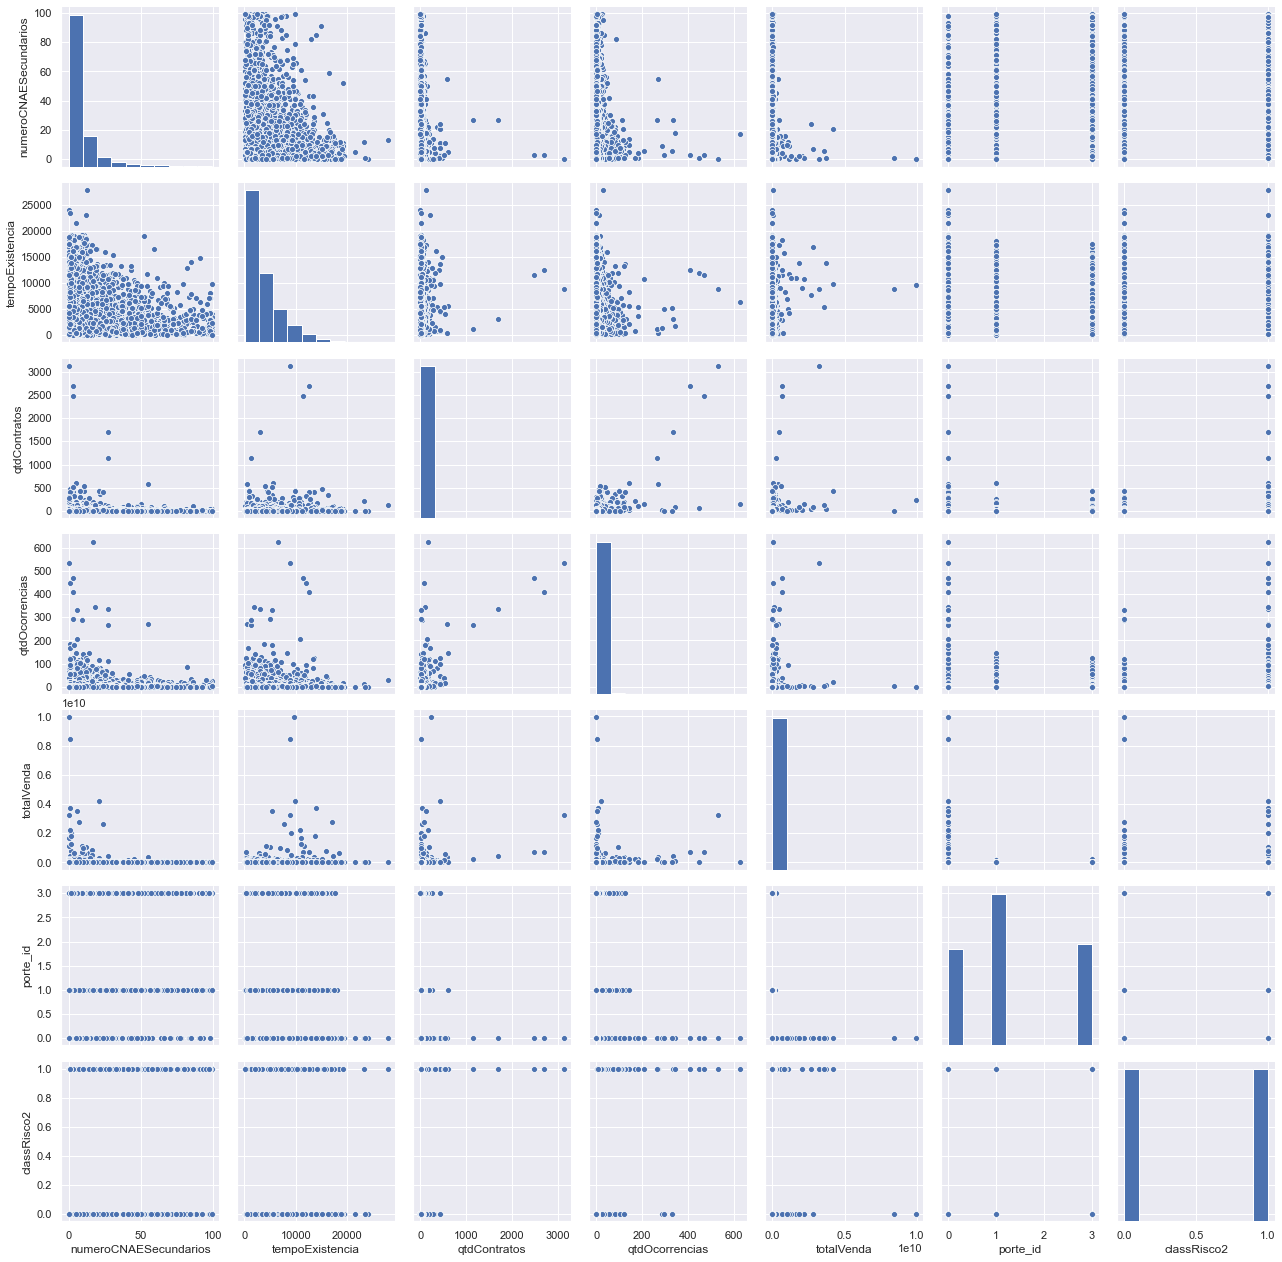

In [ ]:
sns.pairplot(dados)

## Gráficos comparativos dos valores da variável classRisco com as demais variáveis

### Variável classRisco x numeroCNAESecundarios

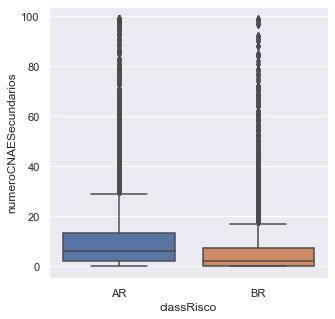

In [ ]:
plt.subplots(figsize=(5,5))
sns.boxplot(y= dados['numeroCNAESecundarios'],
           x= dados['classRisco'])
plt.show()

### Variável classRisco x tempoExistencia

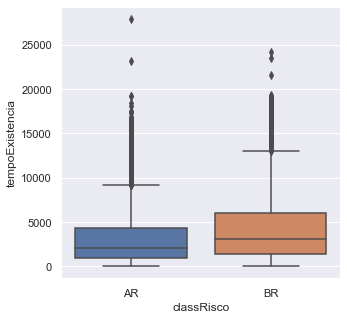

In [ ]:
plt.subplots(figsize=(5,5))
sns.boxplot(y= dados['tempoExistencia'],
           x= dados['classRisco'])
plt.show()

### Variável classRisco x qtdContratos

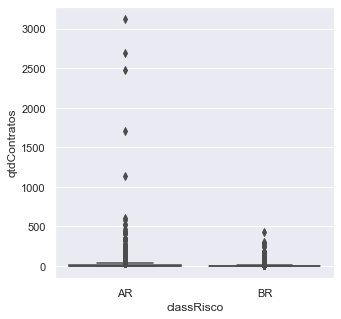

In [ ]:
plt.subplots(figsize=(5,5))
sns.boxplot(y= dados['qtdContratos'],
           x= dados['classRisco'])
plt.show()

### Variável classRisco x qtdOcorrencias

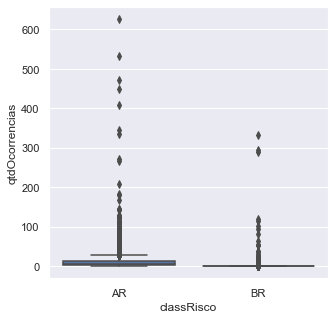

In [ ]:
plt.subplots(figsize=(5,5))
sns.boxplot(y= dados['qtdOcorrencias'],
           x= dados['classRisco'])
plt.show()

### Variável classRisco x porte_id

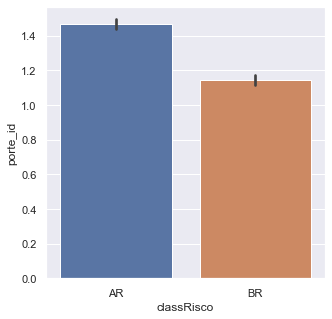

In [ ]:
plt.subplots(figsize=(5,5))
sns.barplot(y= dados['porte_id'],
           x= dados['classRisco'])
plt.show()

# Separar variáveis explicativas de target

## Verificar nomes das colunas

In [ ]:
dados.columns

Index(['numeroCNAESecundarios', 'tempoExistencia', 'qtdContratos',
       'qtdOcorrencias', 'totalVenda', 'classRisco', 'porte_id',
       'classRisco2'],
      dtype='object')

## Criar  explicativas

In [ ]:
expl = dados.drop(columns=['classRisco','classRisco2'], axis=1)
expl.head()

,numeroCNAESecundarios,tempoExistencia,qtdContratos,qtdOcorrencias,totalVenda,porte_id
0,1,1077,1,1,800.00,1
3,6,712,1,1,910.00,1
6,3,1601,1,3,1495.00,1
31,12,126,1,1,1258.89,1
37,9,279,1,4,4050.00,1


## Criar target

In [ ]:
target = dados['classRisco2']
target.head()

0     1
3     1
6     1
31    1
37    1
Name: classRisco2, Length: 5, dtype: int32

# Separar conjunto de treino de conjunto de teste

## Importar biblioteca

In [ ]:
from sklearn.model_selection import train_test_split

## Separar conjunto de treino de conjunto de teste

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(expl,
                                                       target,
                                                       test_size=0.3,
                                                       random_state=42)

## Verificação de x_treino

In [ ]:
x_treino.head()

,numeroCNAESecundarios,tempoExistencia,qtdContratos,qtdOcorrencias,totalVenda,porte_id
79451,0,4897,3,0,7222764.00,0
75648,3,5366,520,37,191439034.90,0
3990,4,3921,1,0,10000.00,1
30578,7,1399,1,0,77208.00,0
47152,0,775,3,0,13950.73,1


## Verificação da quantidade de observações

In [ ]:
print('Numero de observaçoes do treino:', len(x_treino))
print('Numero de observaçoes da teste:',len(x_teste))

Numero de observaçoes do treino: 8990
Numero de observaçoes da teste: 3854


# Seleção de Variáveis

## Método Filtro

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# chamada do objeto
chi_selector = SelectKBest(chi2, k=5)

# treinamento
chi_selector.fit(expl, target)

chi_support  = chi_selector.get_support()
chi_feature = expl.loc[:,chi_support].columns.tolist()

print(str(len(chi_feature)), ' Foram as variaveis selecionadas')
print(chi_feature)

5  Foram as variaveis selecionadas
['numeroCNAESecundarios', 'tempoExistencia', 'qtdContratos', 'qtdOcorrencias', 'totalVenda']


## Método Wrapper
Este método utiliza regressão logística para seleção de variáveis.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(random_state=42),
                  step=10,
                  n_features_to_select=5)

rfe_selector.fit(expl, target)

rfe_support = rfe_selector.get_support()
rfe_feature = expl.loc[:,rfe_support].columns.tolist()

print(str(len(rfe_feature)), ' Foram as variaveis selecionadas')
print(rfe_feature)

5  Foram as variaveis selecionadas
['numeroCNAESecundarios', 'tempoExistencia', 'qtdContratos', 'qtdOcorrencias', 'totalVenda']


## Método Embedded

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

emb_selector = SelectFromModel(RandomForestClassifier(random_state=42))

emb_selector.fit(expl, target)

emb_support = emb_selector.get_support()
emb_feature = expl.loc[:,emb_support].columns.tolist()

print(str(len(emb_feature)), ' Foram as variaveis selecionadas')
print(emb_feature)

1  Foram as variaveis selecionadas
['qtdOcorrencias']


## Votação das variáveis selecionadas

In [ ]:
feature_selection_df = pd.DataFrame({'Variáveis': expl.columns,
                                    'Chi-2':chi_support,
                                    'RFE': rfe_support,
                                    'RandomForest':emb_support})

feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)

# printar as top vars que foram selecionadas

feature_selection_df = feature_selection_df.sort_values(['Total','Variáveis'],
                                                       ascending=False)

feature_selection_df

,Variáveis,Chi-2,RFE,RandomForest,Total
3,qtdOcorrencias,True,True,True,3
4,totalVenda,True,True,False,2
1,tempoExistencia,True,True,False,2
2,qtdContratos,True,True,False,2
0,numeroCNAESecundarios,True,True,False,2
5,porte_id,False,False,False,0


## Criação de banco de dados com variáveis selecionadas

In [ ]:
# Criação de banco de dados com variáveis selecionadas
expl_select = expl.drop(['porte_id'],axis=1)

In [ ]:
expl_select.head()

,numeroCNAESecundarios,tempoExistencia,qtdContratos,qtdOcorrencias,totalVenda
0,1,1077,1,1,800.00
3,6,712,1,1,910.00
6,3,1601,1,3,1495.00
31,12,126,1,1,1258.89
37,9,279,1,4,4050.00


# Separação em conjunto de treino e de teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(expl_select,
                                                       target,
                                                       test_size=0.3,
                                                       random_state=42)

In [ ]:
x_treino.head()

,numeroCNAESecundarios,tempoExistencia,qtdContratos,qtdOcorrencias,totalVenda
79451,0,4897,3,0,7222764.00
75648,3,5366,520,37,191439034.90
3990,4,3921,1,0,10000.00
30578,7,1399,1,0,77208.00
47152,0,775,3,0,13950.73


In [ ]:
y_treino.value_counts() / len(y_treino)

0   0.50
1   0.50
Name: classRisco2, Length: 2, dtype: float64

In [ ]:
y_teste.value_counts() / len(y_teste)

1   0.51
0   0.49
Name: classRisco2, Length: 2, dtype: float64

# Tuninng de hiperparâmetros
Inicialmente, chamar o módulo de tuning.<br>
Passo a passo <br>
1 - definir um dict(dicionario com os valores dos hiperparams)<br>
2 - chamar o modulo de tunning<br>
3 - chamar obj do tunning<br>
4 - treinamento<br>
5 - avaliar os resultados

## Chamar o módulo de tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

## Random Forest

### Criar dicionário com parâmetros a serem testados

In [ ]:
#1
rf_dict = {# nome do dicionário que está sendo criado.
    'n_estimators':[50,100,200,300,800,1000],   # numero de estimadores que será testado. Quanto maior, mais exige poder computacional.
    'criterion':['gini', 'entropy'],   #  critérios
    'bootstrap':[False, True],  # Faz amostragem com e sem reposição.
    'random_state': [196]
}

rf_dict

{'n_estimators': [50, 100, 200, 300, 800, 1000],
 'criterion': ['gini', 'entropy'],
 'bootstrap': [False, True],
 'random_state': [196]}

### Importar biblioteca de RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### Chamar o objeto de tuning

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Fazer validação cruzada

In [ ]:
#3
rf_grid = GridSearchCV(estimator=rf,       # parametro a ser utilizado. No caso, random forestt
                      param_grid=rf_dict,  # nome do dicionario com parametros
                      scoring='accuracy',  # parametro de validação: acurácia
                      cv=10,
                      n_jobs=-1)               # numero de partições do conjunto de treino a ser feita na validação cruzada (k-fold)

rf_grid

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

### Treinar o modelo

In [ ]:
#4
rf_grid.fit(x_treino, y_treino)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

### Mostrar os melhores parâmetros

In [ ]:
#5
rf_grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'n_estimators': 100,
 'random_state': 196}

### Mostrar o melhor score

In [ ]:
rf_grid.best_score_

0.921134593993326

### Calcular acurácia

#### Importar as bibliotecas

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### Calcular acurácia

##### Cálculo da acurácia de treino

In [ ]:
acc_rf_grid_treino = accuracy_score(y_treino, rf_grid.predict(x_treino))

##### Cálculo da acurácia de teste

In [ ]:
acc_rf_grid_teste = accuracy_score(y_teste, rf_grid.predict(x_teste))

#### Mostrar acurácia

In [ ]:
print('Acuracia de treino:', acc_rf_grid_treino)
print('Acuracia de teste:', acc_rf_grid_teste)

Acuracia de treino: 1.0
Acuracia de teste: 0.9174883238194084


In [ ]:
confusion_matrix(y_treino, rf_grid.predict(x_treino))

array([[4522,    0],
       [   0, 4468]], dtype=int64)

In [ ]:
expl.columns

Index(['numeroCNAESecundarios', 'tempoExistencia', 'qtdContratos',
       'qtdOcorrencias', 'totalVenda', 'porte_id'],
      dtype='object')

In [ ]:
# rf_grid.feature_importance

## Gradient Boosting

### Criar dicionário com parâmetros a serem testados

In [ ]:
#1
gb_dict = { 
    'n_estimators': [10,30,50],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse", "mae"],
        'random_state': [42]
}

gb_dict

{'n_estimators': [10, 30, 50],
 'max_features': ['log2', 'sqrt'],
 'criterion': ['friedman_mse', 'mae'],
 'random_state': [42]}

### Importar biblioteca do GradientBoostingClassifier

In [ ]:
#2
from sklearn.ensemble import GradientBoostingClassifier

### Chamar o objeto de tuning

In [ ]:
gb = GradientBoostingClassifier(random_state=42)
gb

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Fazer validação cruzada

In [ ]:
gb_grid = GridSearchCV(estimator=gb,       # parametro a ser utilizado. No caso, gradient boosting
                      param_grid=gb_dict,  # nome do dicionario com parametros
                      scoring='accuracy',  # parametro de validação: acurácia
                      cv=10,                # numero de partições do conjunto de treino a ser feita na validação cruzada (k-fold)
                      n_jobs=-1)              
gb_grid

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

### Treinar o modelo

In [ ]:
#4
gb_grid.fit(x_treino, y_treino)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

### Mostrar os melhores parâmetros

In [ ]:
gb_grid.best_params_

{'criterion': 'mae',
 'max_features': 'log2',
 'n_estimators': 50,
 'random_state': 42}

### Mostrar o melhor score

In [ ]:
gb_grid.best_score_

0.9252502780867632

### Mostrar feature_importances_

In [ ]:
gb_grid.best_estimator_.feature_importances_

array([0.030079  , 0.00599467, 0.12528376, 0.77094862, 0.06769395])

### Mostrar colunas

In [ ]:
x_treino.columns

Index(['numeroCNAESecundarios', 'tempoExistencia', 'qtdContratos',
       'qtdOcorrencias', 'totalVenda'],
      dtype='object')

### Construir dataframe com feature importance

In [ ]:
gb_feature_importance = pd.DataFrame(gb_grid.best_estimator_.feature_importances_, index= x_treino.columns)
gb_feature_importance.head()

,0
numeroCNAESecundarios,0.03
tempoExistencia,0.01
qtdContratos,0.13
qtdOcorrencias,0.77
totalVenda,0.07


### Calcular acurácia

#### Calcular acurácia

##### Cálculo da acurácia de treino

In [ ]:
acc_gb_grid_treino = accuracy_score(y_treino,
                                    gb_grid.predict(  # este é o objeto do grid, já com os melhores parametros
                                        x_treino))

##### Cálculo da acurácia de teste

In [ ]:
acc_gb_grid_teste = accuracy_score(y_teste, gb_grid.predict(x_teste))

#### Mostrar acurácia

In [ ]:
print('Acuracia de treino:', acc_gb_grid_treino)
print('Acuracia de teste:', acc_gb_grid_teste)

Acuracia de treino: 0.925027808676307
Acuracia de teste: 0.918266735858848


# Comparação e escolha do modelo vencedor

In [ ]:
modelos = pd.DataFrame({
        'Modelo' : ['Random Forest',
                   'Gradient Boost'],
        'Acuracia de treino': [acc_rf_grid_treino,
                               acc_gb_grid_treino],
        'Acuracia de teste': [acc_rf_grid_teste,
                               acc_gb_grid_teste]
})

modelos = modelos.sort_values(by='Acuracia de teste', ascending=False)
modelos

,Modelo,Acuracia de treino,Acuracia de teste
1,Gradient Boost,0.93,0.92
0,Random Forest,1.00,0.92


### Precision / Recall do Gradient Boosting

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_treino,gb_grid.predict(x_treino)))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      4522
           1       0.88      1.00      0.93      4468

    accuracy                           0.93      8990
   macro avg       0.94      0.93      0.93      8990
weighted avg       0.94      0.93      0.93      8990



In [ ]:
print(classification_report(y_teste,gb_grid.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1900
           1       0.87      0.99      0.93      1954

    accuracy                           0.92      3854
   macro avg       0.93      0.92      0.92      3854
weighted avg       0.93      0.92      0.92      3854

